<h2 align="center"> Discrete-Time State Variable Systems in Python</h2>
<h5 align="center"> yuecao@purdue.edu    Feb/2024</h5>

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete, lti, dstep
plt.rcParams['figure.dpi'] = 600

$$
\begin{align}
\dot{x}&=\begin{bmatrix}
0 & 2\\
-5 & -3
\end{bmatrix}x+\begin{bmatrix}
4 \\
10 
\end{bmatrix}u\\
y&=\begin{bmatrix}
2 & 1
\end{bmatrix}x
\end{align}
$$


In [85]:
# Define State Space System
A = np.array([[0, 2.],[-5., -3.]])
B = np.array([[4.],[10.]])
C = np.array([[2., 1.]])
D = np.array([[0.]])
l_system = lti(A, B, C, D)

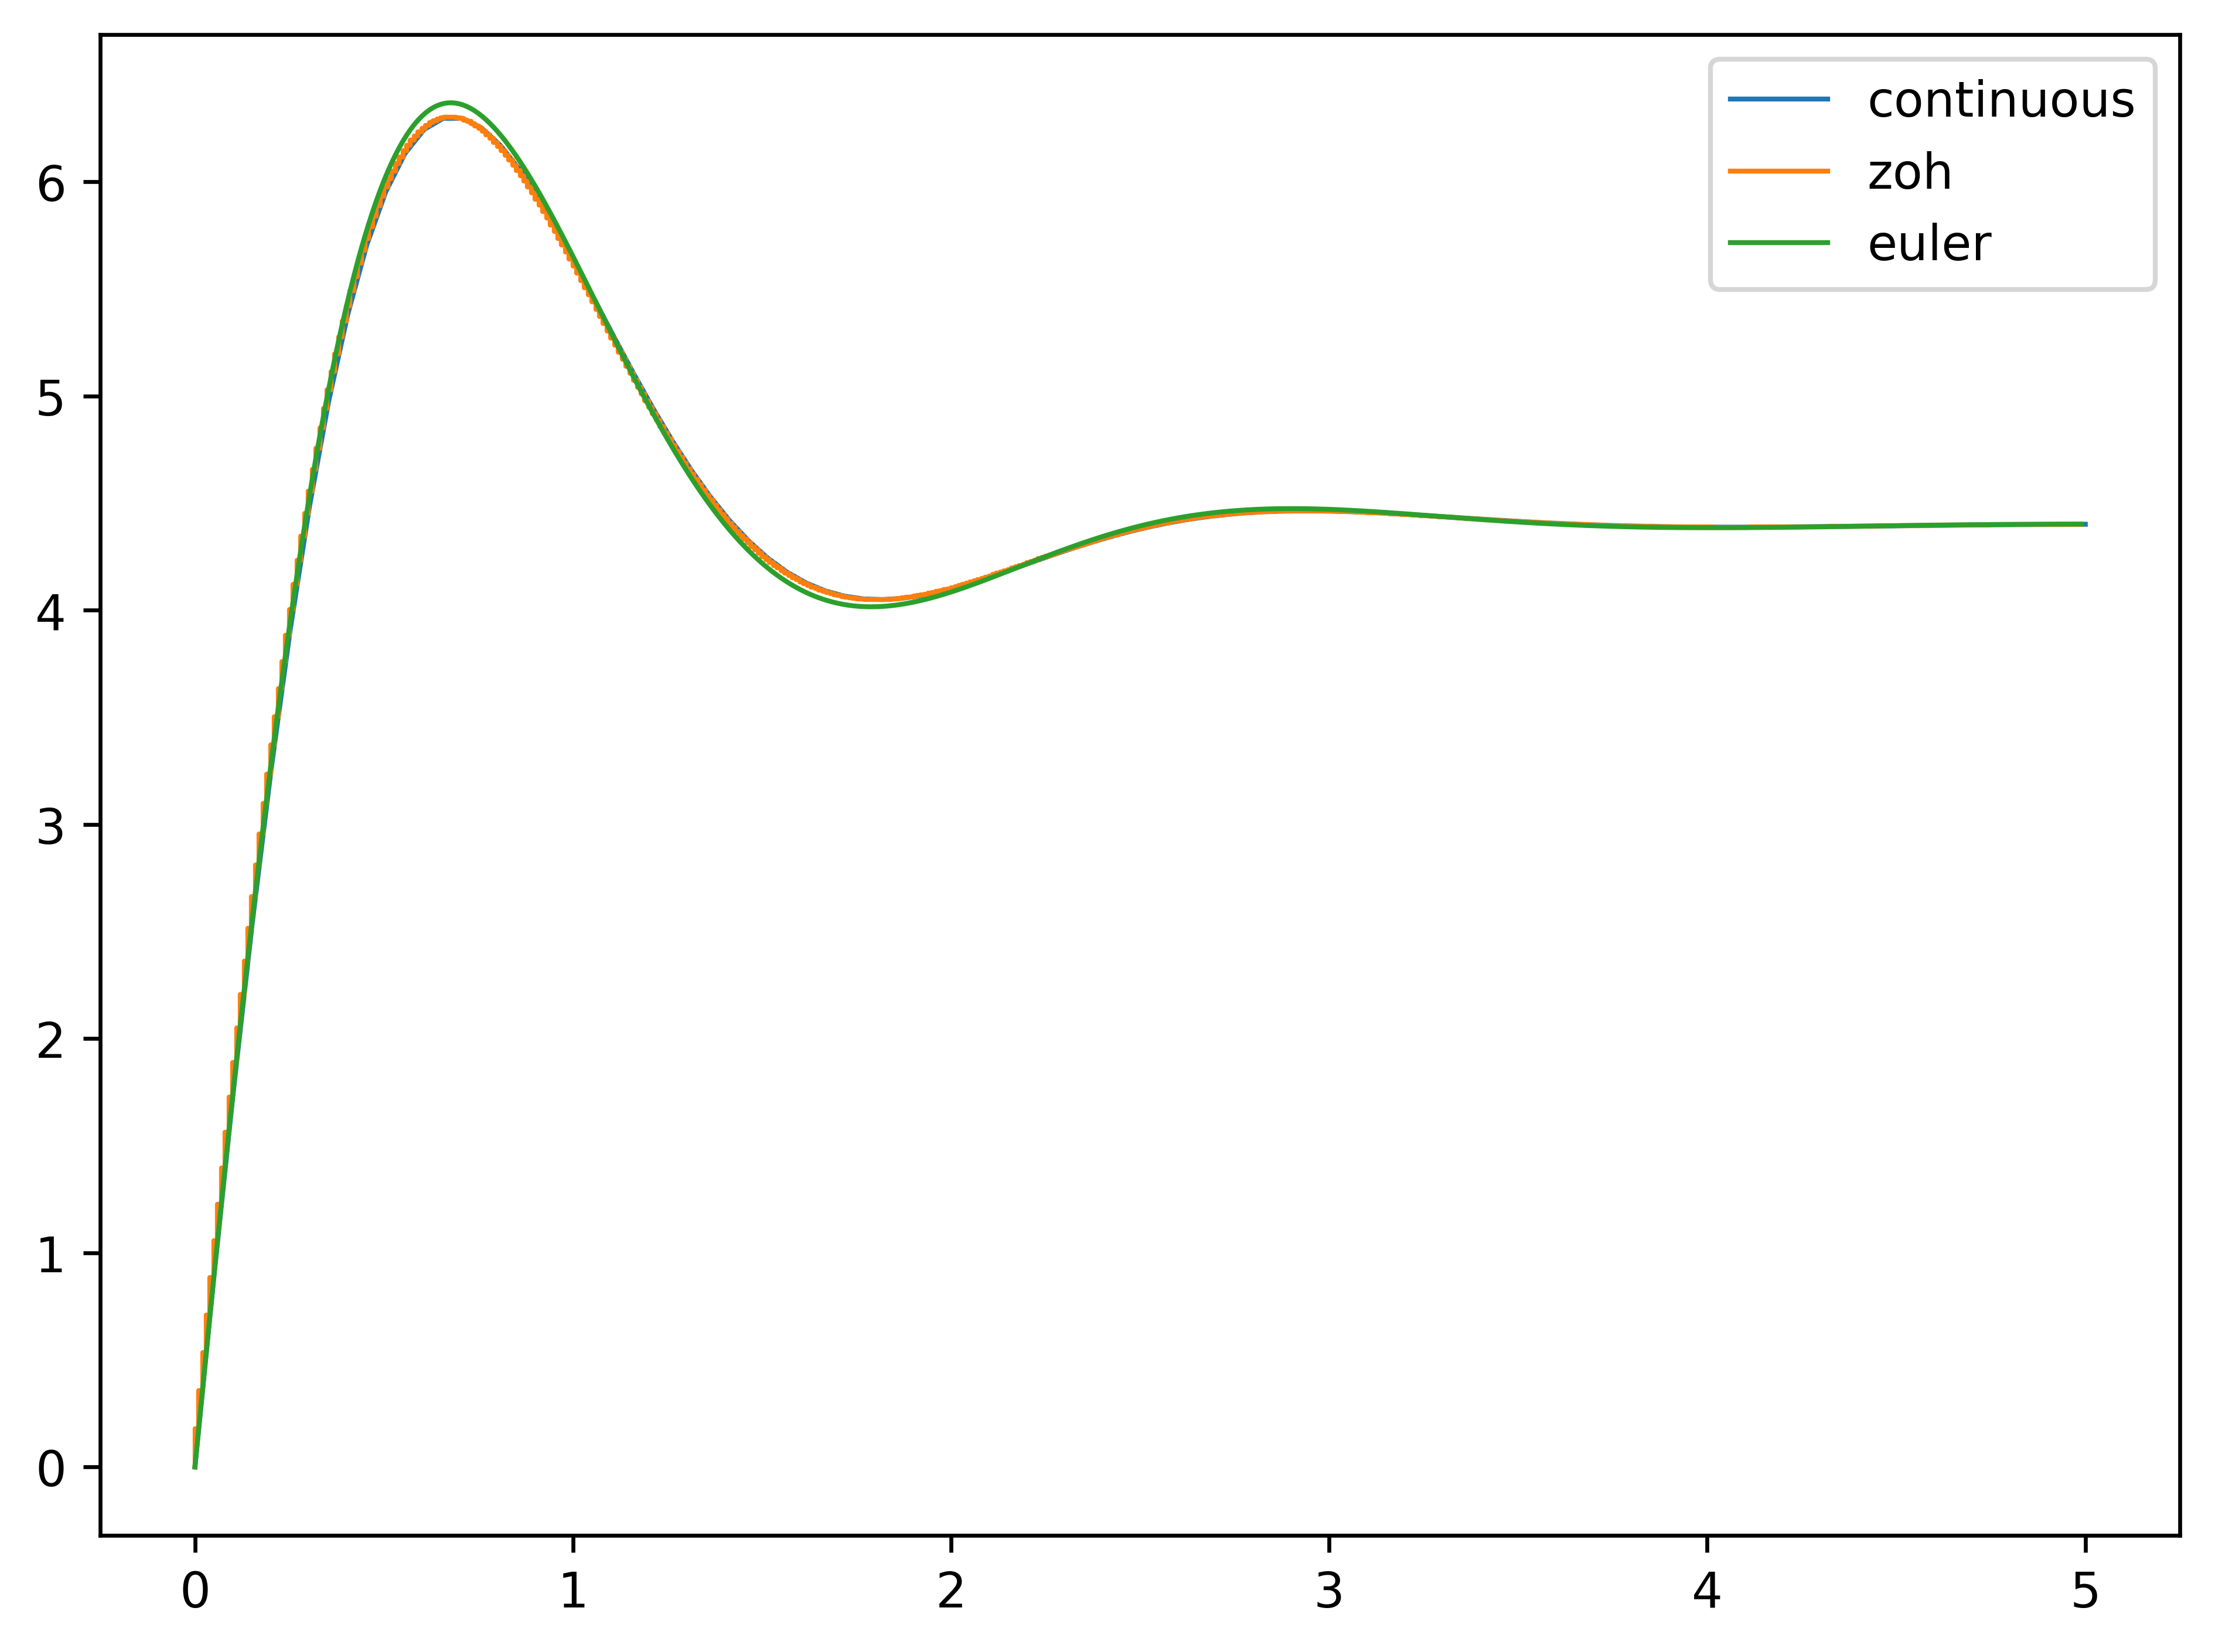

In [97]:
fig, ax = plt.subplots()
t, y = l_system.step(T=np.linspace(0, 5, 100))
ax.plot(t, y, label='continuous', linewidth=1)
# Start from 0.2
dt = 0.01

# Discrete System 1
d_system1 = cont2discrete((A, B, C, D), dt, method='zoh')
s, y_d1 = dstep(d_system1, n=int(5.0/dt))
ax.step(s, np.squeeze(y_d1), label='zoh', linewidth=1)

# Discrete System 2
d_system2 = cont2discrete((A, B, C, D), dt, method='euler')
s, y_d2 = dstep(d_system2, n=int(5.0/dt))
plt.plot(s, np.squeeze(y_d2), label='euler',linewidth=1)

ax.step
ax.legend(loc='best')
fig.tight_layout()
plt.show()

# Try 'bilinear',  'backward_diff', 'foh', 'impulse'

<h3 align="center">Stable System!</h3>

(array([[ 1.  ,  0.02],
       [-0.05,  0.97]]), array([[0.04],
       [0.1 ]]), array([[2., 1.]]), array([[0.]]), 0.01)


In [98]:
from scipy.signal import ss2tf
ss2tf(A, B, C, D)

(array([[ 0., 18., 44.]]), array([ 1.,  3., 10.]))

$$
H(s)=\frac{18s+44}{s^2+3s+10}
$$

<h3  align="center">Both roots are on the open left-half plane</h3>
<h3 align="center" >So the continuous system is  <strong>Stable</strong></h3>



In [100]:
print(d_system2)

(array([[ 1.  ,  0.02],
       [-0.05,  0.97]]), array([[0.04],
       [0.1 ]]), array([[2., 1.]]), array([[0.]]), 0.01)


<div align="center">Convert to discrete system using euler, Sampling time = 0.01</div>
$$
\begin{align}
x(k+1)&=\begin{bmatrix}
1 & 0.02\\
-0.05 & 0.97
\end{bmatrix}x(k)+\begin{bmatrix}
0.04 \\
0.1
\end{bmatrix}u(k)\\
y(k+1)&=\begin{bmatrix}
2 & 1
\end{bmatrix}x(k)
\end{align}
$$

<h3 align="center">Is the discrete system still stable?</h3 >